In [1]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
widths = [1]*32
df = pd.read_fwf('digitdata/optdigits-orig_train.txt', widths=widths, header=None, skiprows=lambda x : (x+1) % 33 == 0)
# df
df_Y = pd.read_fwf('digitdata/optdigits-orig_train.txt', widths=[2], header=None, skiprows=lambda x : (x+1) % 33 != 0)

In [3]:
df_trainX = pd.DataFrame(df.values.reshape(2436, -1))
df_trainY = df_Y
df_trainY.columns = ['label']
# df_Y

In [4]:
df = pd.read_fwf('digitdata/optdigits-orig_test.txt', widths=widths, header=None, skiprows=lambda x : (x+1) % 33 == 0)
df_Y = pd.read_fwf('digitdata/optdigits-orig_test.txt', widths=[2], header=None, skiprows=lambda x : (x+1) % 33 != 0)


In [5]:
df_testX = pd.DataFrame(df.values.reshape(444, -1))
df_testY = df_Y
df_testY.columns = ['label']

In [6]:
class_count = np.array((df_trainY['label'].value_counts().sort_index()))
# class_count

In [7]:
class_log_prior = np.log(class_count) - np.log(len(df_trainY))
# class_log_prior

In [8]:
feature_count = np.array([[sum(df_trainX[df_trainY['label'] == i].iloc[:,j]) for i in range(10)] for j in range(1024)]).T
# feature_count

In [9]:
def calc_feature_log_prob(feature_count, k=1):
    smoothed_fc = feature_count + k
    smoothed_cc = smoothed_fc.sum(axis=1)
    return (np.log(smoothed_fc) - np.log(smoothed_cc.reshape(-1, 1)))

In [10]:
feature_log_prob = [calc_feature_log_prob(feature_count, 0.1), \
                    calc_feature_log_prob(feature_count, 1), \
                    calc_feature_log_prob(feature_count, 5), \
                    calc_feature_log_prob(feature_count, 10)]
# feature_log_prob

In [11]:
joint_log_likelihood = [df_testX @ feature_log_prob[0].T + class_log_prior, \
                        df_testX @ feature_log_prob[1].T + class_log_prior, \
                        df_testX @ feature_log_prob[2].T + class_log_prior, \
                        df_testX @ feature_log_prob[3].T + class_log_prior]
# joint_log_likelihood

In [12]:
pred = [np.argmax(joint_log_likelihood[0], axis=1), \
        np.argmax(joint_log_likelihood[1], axis=1), \
        np.argmax(joint_log_likelihood[2], axis=1), \
        np.argmax(joint_log_likelihood[3], axis=1)]

In [13]:
smooth_k = [0.1, 1, 5, 10]
for i in range(4):
    y_pred = pd.Series(pred[i])
    df_confusion = pd.crosstab(df_testY['label'], y_pred)

    conf_percent = df_confusion.values / df_confusion.sum(axis=1).values.reshape(-1,1)
    df_conf_percent = round(pd.DataFrame(conf_percent).rename_axis('Actual').rename_axis('Prediction', axis=1), 4)*100
    print('Test set Confusion Matrix: Actual vs. Prediction (Smoothing value k = {})'.format(smooth_k[i]))
    display(df_conf_percent)
    display(pd.DataFrame(np.diag(df_conf_percent), columns=['Accuracy']))
    print('Average Accuracy: {}'.format(np.mean(np.diag(df_conf_percent))))
    print('\n')
# df_conf_percent

Test set Confusion Matrix: Actual vs. Prediction (Smoothing value k = 0.1)


Prediction,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,97.22,0.00,0.00,0.00,2.78,0.00,0.00,0.00,0.00,0.00
1,0.00,88.89,2.22,0.00,0.00,0.00,0.00,2.22,4.44,2.22
2,0.00,0.00,85.37,0.00,0.00,0.00,0.00,0.00,12.20,2.44
3,0.00,0.00,0.00,87.88,0.00,0.00,0.00,3.03,3.03,6.06
4,0.00,0.00,0.00,0.00,89.83,0.00,0.00,5.08,5.08,0.00
5,0.00,1.72,0.00,0.00,0.00,89.66,0.00,0.00,0.00,8.62
6,0.00,0.00,0.00,0.00,0.00,0.00,97.67,0.00,2.33,0.00
7,0.00,0.00,0.00,0.00,0.00,2.13,0.00,97.87,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00,0.00


,Accuracy
0,97.22
1,88.89
2,85.37
3,87.88
4,89.83
5,89.66
6,97.67
7,97.87
8,100.00
9,88.10


Average Accuracy: 92.24900000000001


Test set Confusion Matrix: Actual vs. Prediction (Smoothing value k = 1)


Prediction,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,97.22,0.00,0.00,0.00,2.78,0.00,0.00,0.00,0.00,0.00
1,0.00,88.89,2.22,0.00,0.00,0.00,0.00,2.22,4.44,2.22
2,0.00,0.00,85.37,0.00,0.00,0.00,0.00,0.00,12.20,2.44
3,0.00,0.00,0.00,87.88,0.00,0.00,0.00,3.03,3.03,6.06
4,0.00,0.00,0.00,0.00,89.83,0.00,0.00,5.08,5.08,0.00
5,0.00,1.72,0.00,0.00,0.00,89.66,0.00,0.00,0.00,8.62
6,0.00,0.00,0.00,0.00,0.00,0.00,97.67,0.00,2.33,0.00
7,0.00,0.00,0.00,0.00,0.00,2.13,0.00,97.87,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00,0.00


,Accuracy
0,97.22
1,88.89
2,85.37
3,87.88
4,89.83
5,89.66
6,97.67
7,97.87
8,100.00
9,90.48


Average Accuracy: 92.48700000000001


Test set Confusion Matrix: Actual vs. Prediction (Smoothing value k = 5)


Prediction,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,97.22,0.00,0.00,0.00,2.78,0.00,0.00,0.00,0.00,0.00
1,0.00,91.11,0.00,0.00,0.00,0.00,0.00,2.22,4.44,2.22
2,0.00,0.00,85.37,0.00,0.00,0.00,0.00,0.00,12.20,2.44
3,0.00,0.00,0.00,90.91,0.00,0.00,0.00,3.03,0.00,6.06
4,0.00,0.00,0.00,0.00,89.83,0.00,0.00,5.08,5.08,0.00
5,0.00,1.72,0.00,0.00,0.00,89.66,0.00,0.00,0.00,8.62
6,0.00,0.00,0.00,0.00,0.00,0.00,97.67,0.00,2.33,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,97.87,2.13,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00,0.00


,Accuracy
0,97.22
1,91.11
2,85.37
3,90.91
4,89.83
5,89.66
6,97.67
7,97.87
8,100.00
9,90.48


Average Accuracy: 93.01200000000001


Test set Confusion Matrix: Actual vs. Prediction (Smoothing value k = 10)


Prediction,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,97.22,0.00,0.00,0.00,2.78,0.00,0.00,0.00,0.00,0.00
1,0.00,91.11,0.00,0.00,0.00,0.00,0.00,2.22,4.44,2.22
2,0.00,0.00,85.37,0.00,0.00,0.00,0.00,0.00,12.20,2.44
3,0.00,0.00,0.00,90.91,0.00,0.00,0.00,3.03,0.00,6.06
4,0.00,0.00,0.00,0.00,89.83,0.00,0.00,5.08,5.08,0.00
5,0.00,1.72,0.00,0.00,0.00,89.66,0.00,0.00,0.00,8.62
6,0.00,0.00,0.00,0.00,0.00,0.00,97.67,0.00,2.33,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,97.87,2.13,0.00
8,0.00,2.50,0.00,0.00,0.00,0.00,0.00,0.00,97.50,0.00


,Accuracy
0,97.22
1,91.11
2,85.37
3,90.91
4,89.83
5,89.66
6,97.67
7,97.87
8,97.50
9,88.10


Average Accuracy: 92.52400000000002




### Choose the smoothing parameter with the best average accuracy (k=5)

In [14]:
LL_pred = pd.concat([pd.DataFrame(joint_log_likelihood[2]), df_testY], axis=1)
# LL_pred

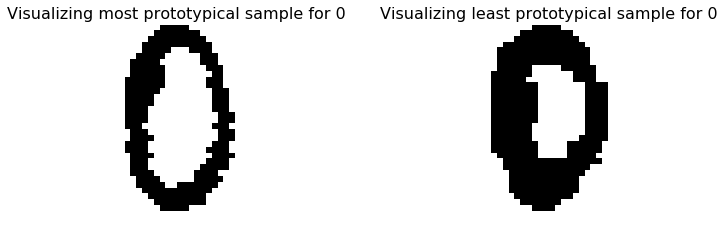

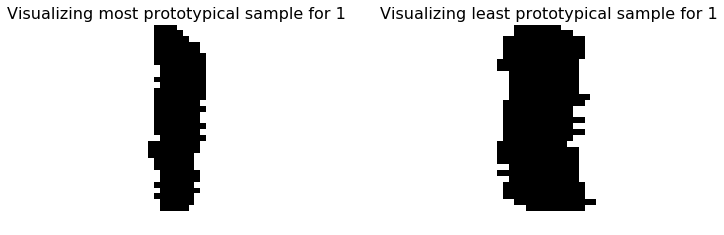

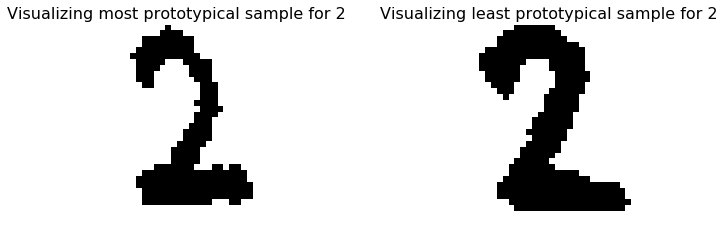

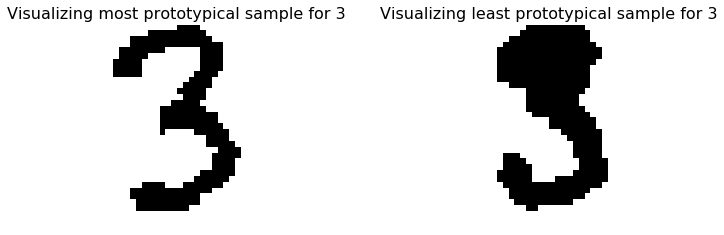

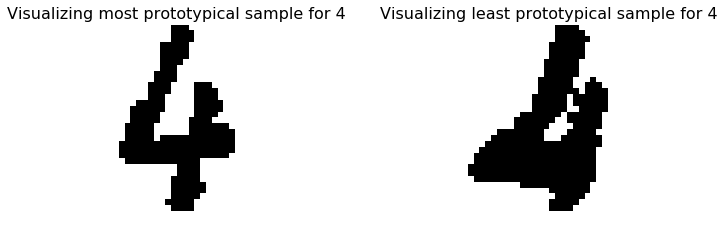

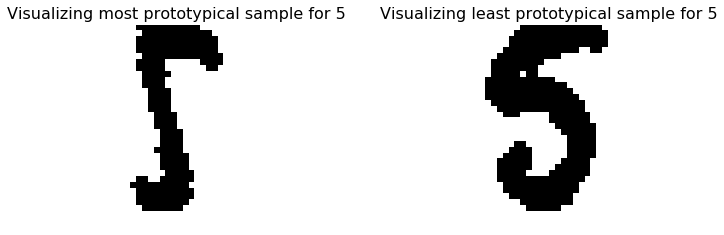

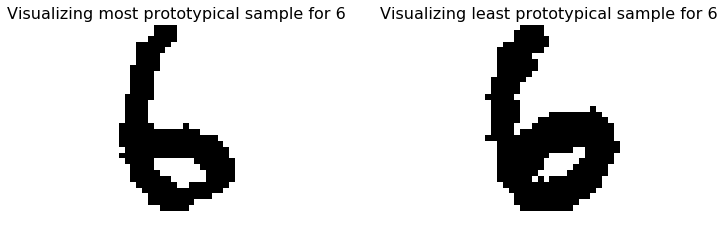

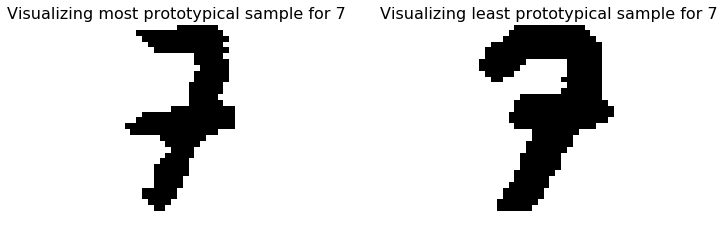

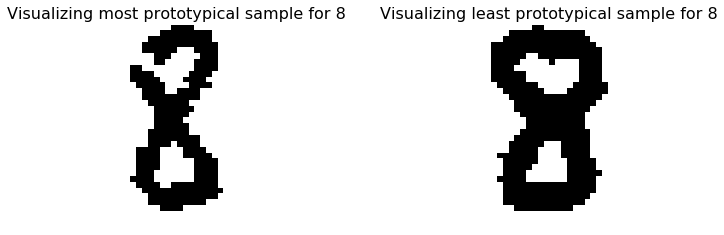

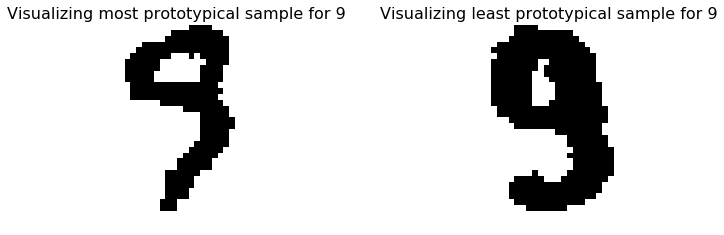

In [15]:
for index in range(10):
    i_most = LL_pred[LL_pred['label']==index].iloc[:,index].idxmax()
    i_least = LL_pred[LL_pred['label']==index].iloc[:,index].idxmin()
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
    ax1.imshow(df_testX.iloc[i_most,:].values.reshape((32,32)), cmap='Greys')
    ax2.imshow(df_testX.iloc[i_least,:].values.reshape((32,32)), cmap='Greys')
    ax1.set_title('Visualizing most prototypical sample for {}'.format(index), fontsize=16)
    ax2.set_title('Visualizing least prototypical sample for {}'.format(index), fontsize=16)
    ax1.axis('off')
    ax2.axis('off')
    plt.subplots_adjust(wspace=1)
    plt.show()


In [16]:
def plot_log_odds_ratio(c1, c2):
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))
    ax1 = sns.heatmap(feature_log_prob[2][c1].reshape((32,32)), ax=ax1, cmap='jet', xticklabels=False, yticklabels=False)
    ax2 = sns.heatmap(feature_log_prob[2][c2].reshape((32,32)), ax=ax2, cmap='jet', xticklabels=False, yticklabels=False)
    ax3 = sns.heatmap((feature_log_prob[2][c1] - feature_log_prob[2][c2]).reshape((32,32)), ax=ax3, cmap='jet', xticklabels=False, yticklabels=False)
    plt.subplots_adjust(wspace=0.3)
    plt.show()

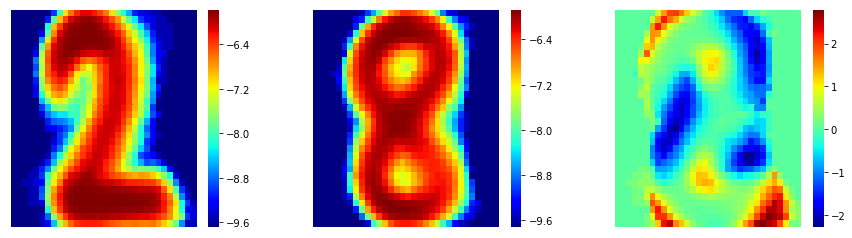

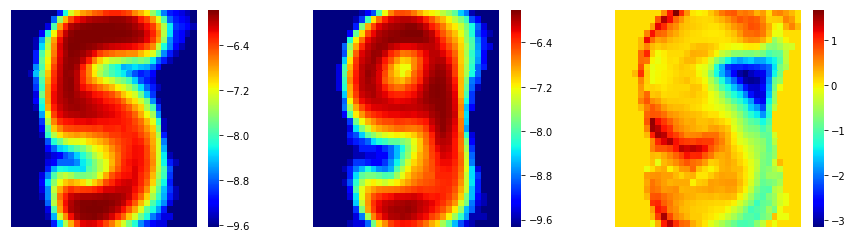

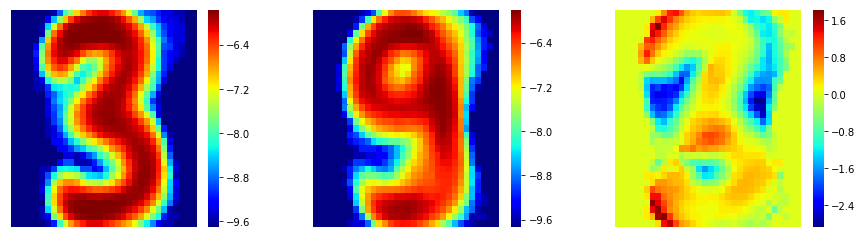

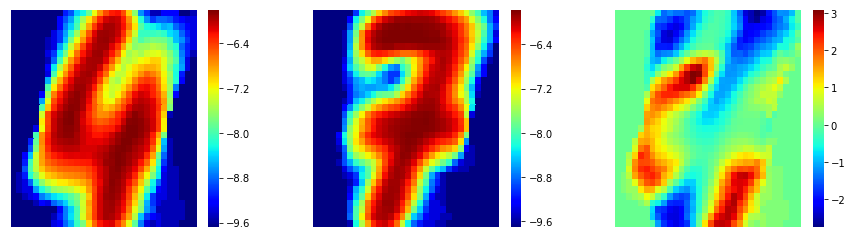

In [17]:
for i, cls in enumerate(zip([2,5,3,4], [8,9,9,7])):
    plot_log_odds_ratio(cls[0], cls[1])

# Part 2.1

In [18]:
def predict(feature_set, w):
    predicted = np.empty(len(feature_set))
    for idx in range(len(feature_set)):
        arg_max, predicted_class = 0, 0
        feature_vector = feature_set.iloc[idx]

        for c in range(10):
            current = np.dot(feature_vector, w[c])
            if current >= arg_max:
                arg_max, predicted_class = current, c
        
        predicted[idx] = predicted_class

    return predicted

In [19]:
def calculate_acc_conf_mat(actual, prediction):
    y_pred = pd.Series(prediction)
    df_confusion = pd.crosstab(actual, y_pred)

    conf_percent = df_confusion.values / df_confusion.sum(axis=1).values.reshape(-1,1)
    df_conf_percent = round(pd.DataFrame(conf_percent).rename_axis('Actual').rename_axis('Prediction', axis=1), 4)*100

    return np.mean(np.diag(df_conf_percent)), df_conf_percent

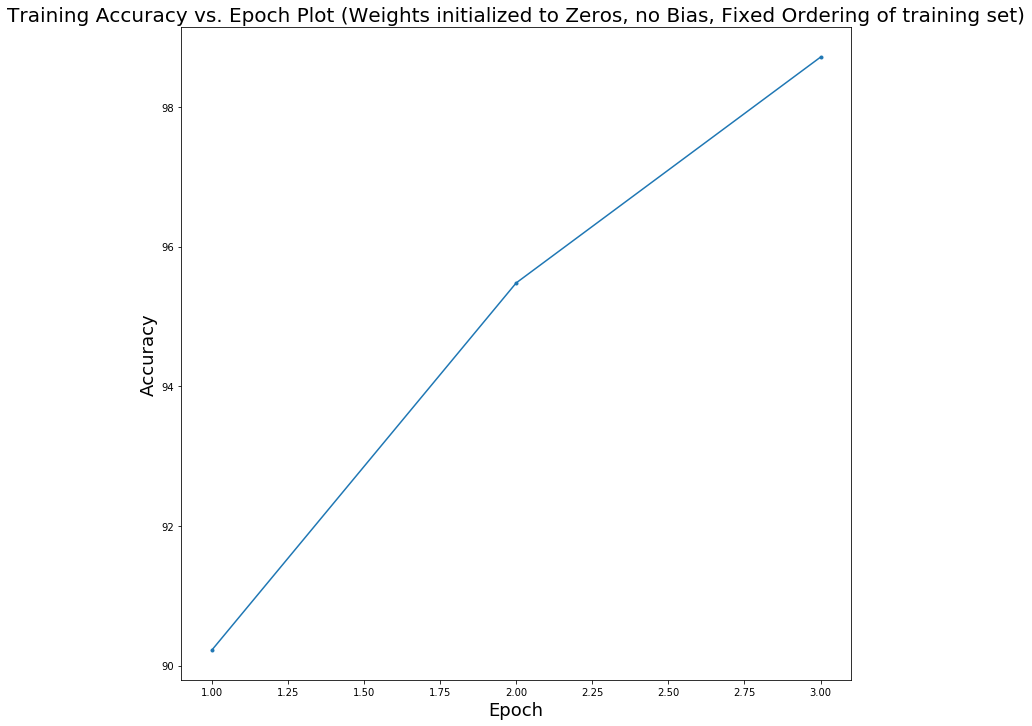

Test set Confusion Matrix: Actual vs. Prediction


Prediction,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,100.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.0,97.78,0.00,0.00,0.00,0.00,0.00,2.22,0.00,0.00
2,0.0,0.00,95.12,0.00,0.00,2.44,0.00,0.00,2.44,0.00
3,0.0,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.0,1.69,0.00,0.00,94.92,0.00,0.00,0.00,3.39,0.00
5,0.0,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00
6,0.0,0.00,0.00,0.00,2.33,0.00,97.67,0.00,0.00,0.00
7,0.0,0.00,0.00,0.00,2.13,0.00,0.00,95.74,0.00,2.13
8,0.0,2.50,0.00,0.00,0.00,2.50,0.00,0.00,95.00,0.00


,Accuracy
0,100.00
1,97.78
2,95.12
3,100.00
4,94.92
5,100.00
6,97.67
7,95.74
8,95.00
9,92.86


Average Accuracy: 96.909




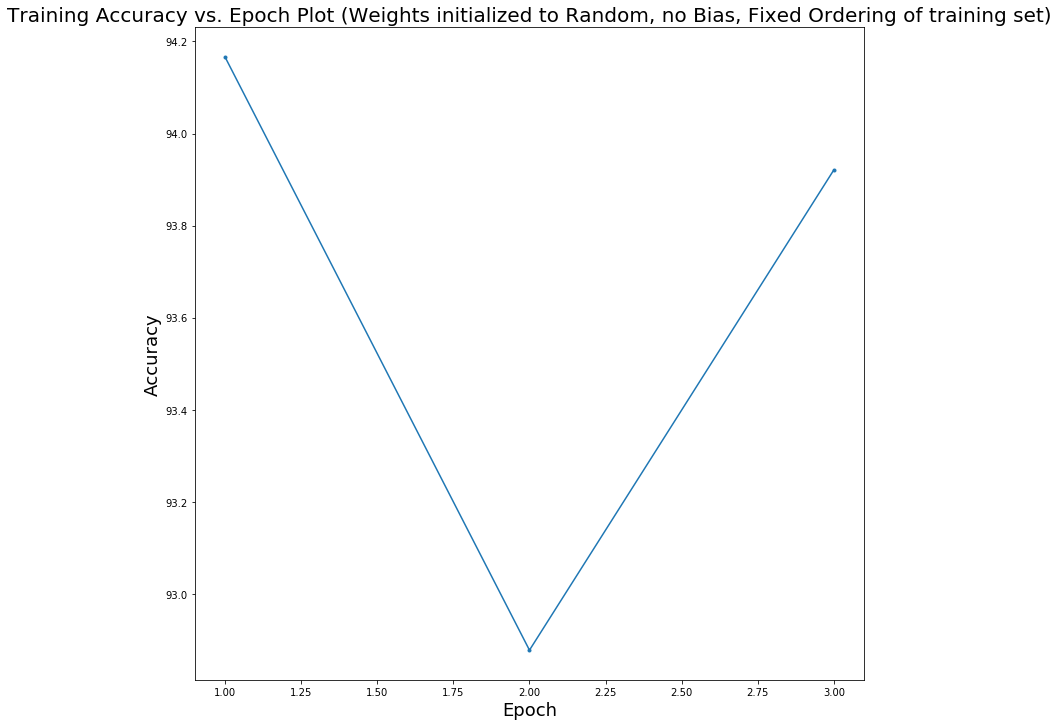

Test set Confusion Matrix: Actual vs. Prediction


Prediction,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,100.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,93.33,0.0,4.44,0.00,0.00,0.00,2.22,0.00,0.00
2,0.00,0.00,87.8,2.44,0.00,0.00,0.00,2.44,7.32,0.00
3,0.00,0.00,0.0,100.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,3.39,0.0,0.00,93.22,0.00,0.00,0.00,3.39,0.00
5,0.00,0.00,0.0,1.72,0.00,98.28,0.00,0.00,0.00,0.00
6,2.33,0.00,0.0,0.00,0.00,0.00,97.67,0.00,0.00,0.00
7,0.00,0.00,0.0,0.00,2.13,0.00,0.00,97.87,0.00,0.00
8,0.00,0.00,0.0,7.50,0.00,2.50,0.00,0.00,90.00,0.00


,Accuracy
0,100.00
1,93.33
2,87.80
3,100.00
4,93.22
5,98.28
6,97.67
7,97.87
8,90.00
9,45.24


Average Accuracy: 90.34100000000001




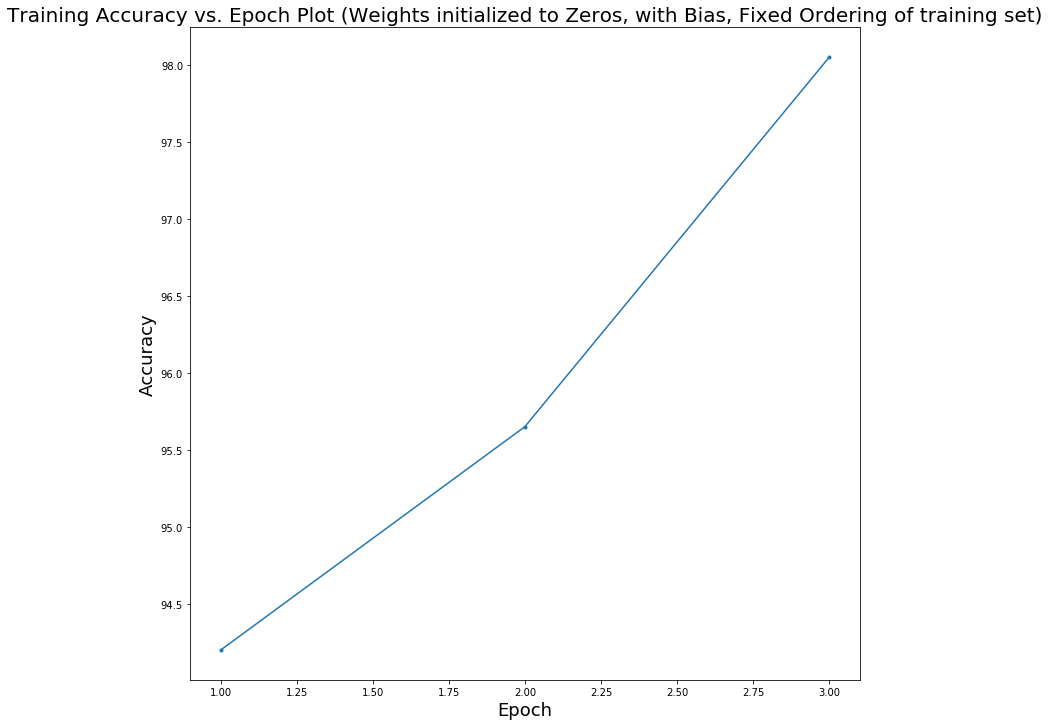

Test set Confusion Matrix: Actual vs. Prediction


Prediction,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,100.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.0,95.56,0.00,2.22,0.00,0.00,0.00,2.22,0.00,0.00
2,0.0,0.00,85.37,0.00,0.00,0.00,0.00,0.00,12.20,2.44
3,0.0,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.0,3.39,0.00,0.00,93.22,0.00,0.00,0.00,3.39,0.00
5,0.0,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00
6,0.0,0.00,0.00,0.00,2.33,0.00,97.67,0.00,0.00,0.00
7,0.0,0.00,0.00,4.26,2.13,0.00,0.00,93.62,0.00,0.00
8,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00,0.00


,Accuracy
0,100.00
1,95.56
2,85.37
3,100.00
4,93.22
5,100.00
6,97.67
7,93.62
8,100.00
9,90.48


Average Accuracy: 95.59200000000001




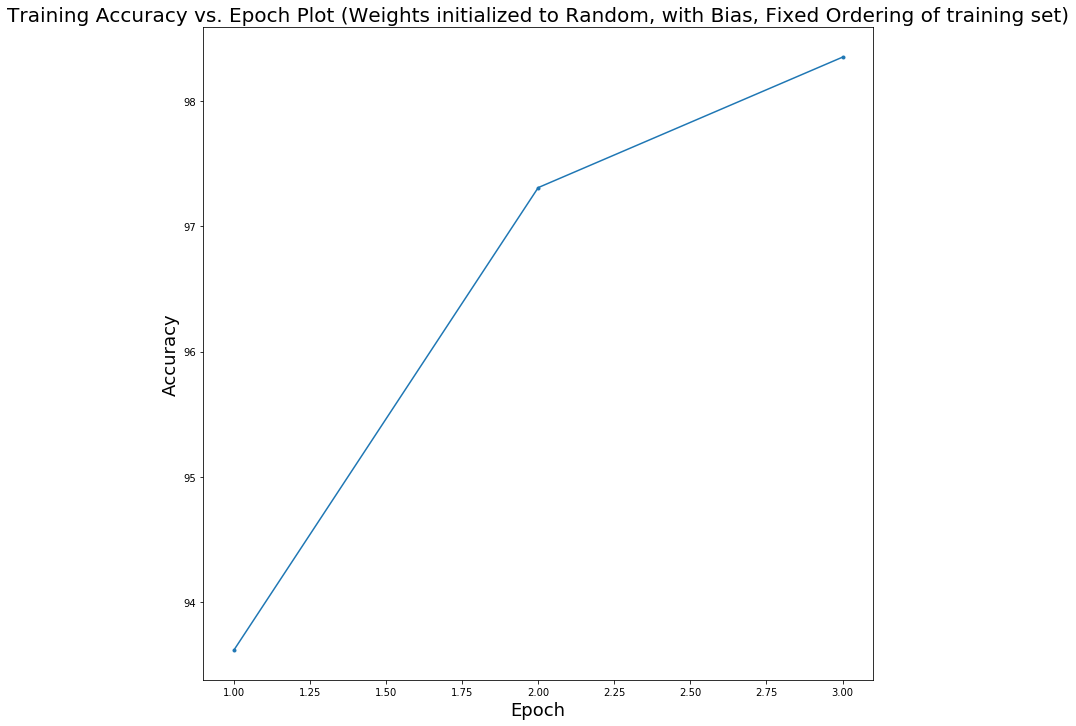

Test set Confusion Matrix: Actual vs. Prediction


Prediction,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,100.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.0,95.56,0.0,2.22,0.00,0.00,0.00,2.22,0.00,0.00
2,0.0,0.00,87.8,0.00,0.00,0.00,0.00,2.44,7.32,2.44
3,0.0,0.00,0.0,100.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.0,0.00,0.0,0.00,94.92,0.00,0.00,0.00,3.39,1.69
5,0.0,0.00,0.0,0.00,0.00,100.00,0.00,0.00,0.00,0.00
6,0.0,0.00,0.0,0.00,2.33,0.00,97.67,0.00,0.00,0.00
7,0.0,0.00,0.0,0.00,2.13,0.00,0.00,97.87,0.00,0.00
8,0.0,0.00,0.0,0.00,0.00,2.50,0.00,0.00,95.00,2.50


,Accuracy
0,100.00
1,95.56
2,87.80
3,100.00
4,94.92
5,100.00
6,97.67
7,97.87
8,95.00
9,92.86


Average Accuracy: 96.168




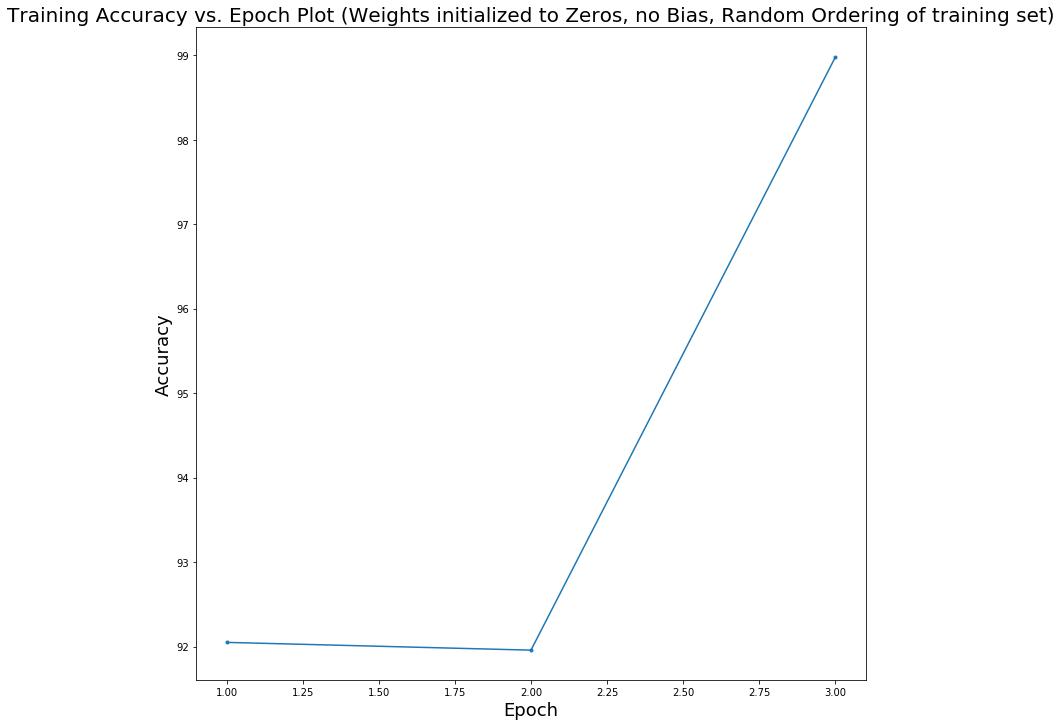

Test set Confusion Matrix: Actual vs. Prediction


Prediction,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,97.78,0.00,0.00,0.00,0.00,0.00,2.22,0.00,0.00
2,0.00,0.00,85.37,0.00,0.00,0.00,0.00,0.00,12.20,2.44
3,0.00,0.00,0.00,96.97,0.00,0.00,0.00,0.00,0.00,3.03
4,0.00,1.69,0.00,0.00,91.53,0.00,0.00,0.00,3.39,3.39
5,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00
6,2.33,0.00,0.00,0.00,0.00,0.00,97.67,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,2.50,0.00,2.50,95.00,0.00


,Accuracy
0,100.00
1,97.78
2,85.37
3,96.97
4,91.53
5,100.00
6,97.67
7,100.00
8,95.00
9,95.24


Average Accuracy: 95.956




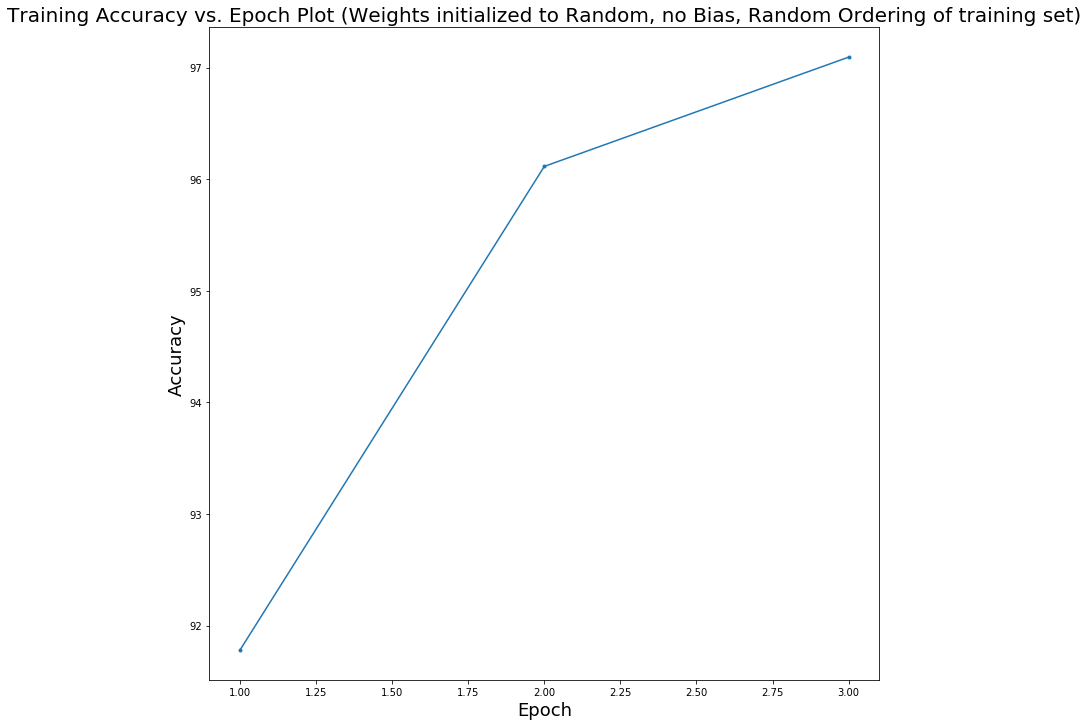

Test set Confusion Matrix: Actual vs. Prediction


Prediction,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,100.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00
1,0.00,97.78,0.0,0.00,0.00,0.0,0.00,2.22,0.00,0.00
2,0.00,0.00,87.8,0.00,0.00,0.0,0.00,0.00,9.76,2.44
3,0.00,0.00,0.0,84.85,0.00,0.0,0.00,0.00,0.00,15.15
4,0.00,1.69,0.0,0.00,93.22,0.0,0.00,0.00,3.39,1.69
5,0.00,0.00,0.0,0.00,0.00,100.0,0.00,0.00,0.00,0.00
6,2.33,0.00,0.0,0.00,0.00,0.0,97.67,0.00,0.00,0.00
7,0.00,0.00,0.0,0.00,0.00,0.0,0.00,100.00,0.00,0.00
8,0.00,0.00,0.0,0.00,0.00,2.5,0.00,2.50,92.50,2.50


,Accuracy
0,100.00
1,97.78
2,87.80
3,84.85
4,93.22
5,100.00
6,97.67
7,100.00
8,92.50
9,100.00


Average Accuracy: 95.38199999999999




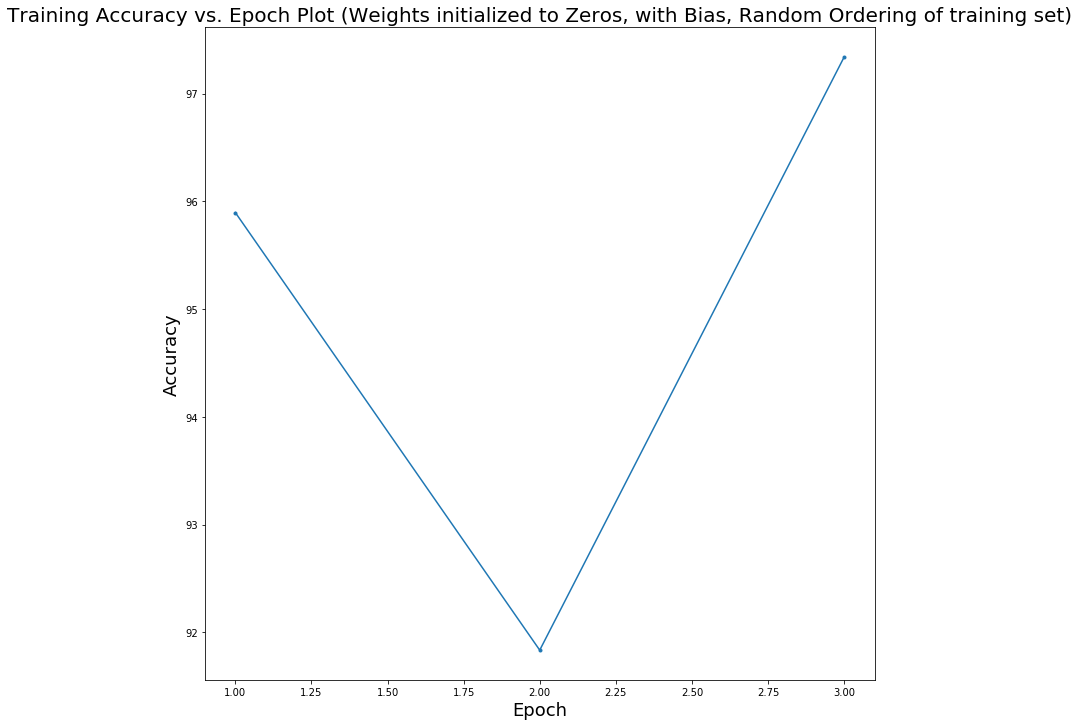

Test set Confusion Matrix: Actual vs. Prediction


Prediction,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,100.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.0,91.11,0.00,0.00,0.00,0.00,0.00,8.89,0.00,0.00
2,0.0,0.00,92.68,0.00,0.00,0.00,0.00,2.44,2.44,2.44
3,0.0,0.00,0.00,96.97,0.00,0.00,0.00,0.00,0.00,3.03
4,0.0,0.00,0.00,0.00,94.92,0.00,0.00,0.00,3.39,1.69
5,0.0,0.00,0.00,0.00,0.00,98.28,0.00,1.72,0.00,0.00
6,0.0,0.00,0.00,0.00,2.33,0.00,97.67,0.00,0.00,0.00
7,0.0,0.00,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00
8,0.0,0.00,5.00,0.00,0.00,0.00,0.00,2.50,85.00,7.50


,Accuracy
0,100.00
1,91.11
2,92.68
3,96.97
4,94.92
5,98.28
6,97.67
7,100.00
8,85.00
9,97.62


Average Accuracy: 95.425




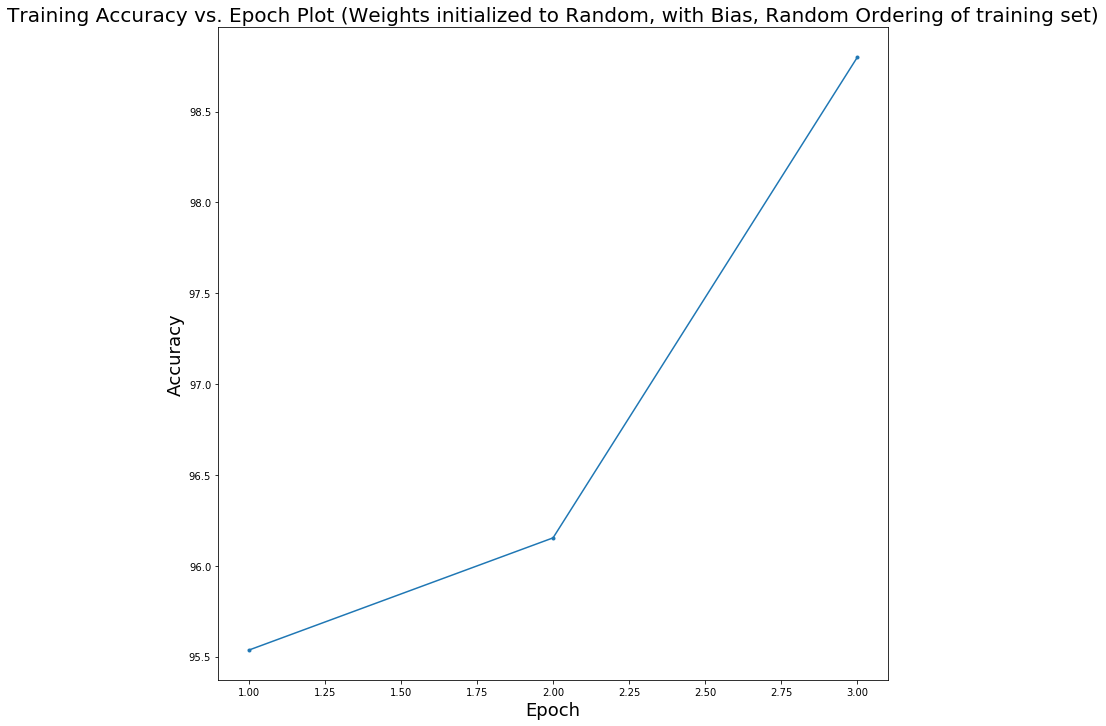

Test set Confusion Matrix: Actual vs. Prediction


Prediction,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,100.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00
1,0.0,95.56,0.0,0.00,0.00,0.0,0.00,4.44,0.00,0.00
2,0.0,0.00,87.8,0.00,0.00,0.0,0.00,0.00,9.76,2.44
3,0.0,0.00,0.0,96.97,0.00,0.0,0.00,0.00,0.00,3.03
4,0.0,1.69,0.0,0.00,94.92,0.0,0.00,0.00,3.39,0.00
5,0.0,0.00,0.0,0.00,0.00,100.0,0.00,0.00,0.00,0.00
6,0.0,0.00,0.0,0.00,2.33,0.0,97.67,0.00,0.00,0.00
7,0.0,0.00,0.0,0.00,2.13,0.0,0.00,97.87,0.00,0.00
8,0.0,0.00,0.0,0.00,0.00,2.5,0.00,2.50,95.00,0.00


,Accuracy
0,100.00
1,95.56
2,87.80
3,96.97
4,94.92
5,100.00
6,97.67
7,97.87
8,95.00
9,100.00


Average Accuracy: 96.579




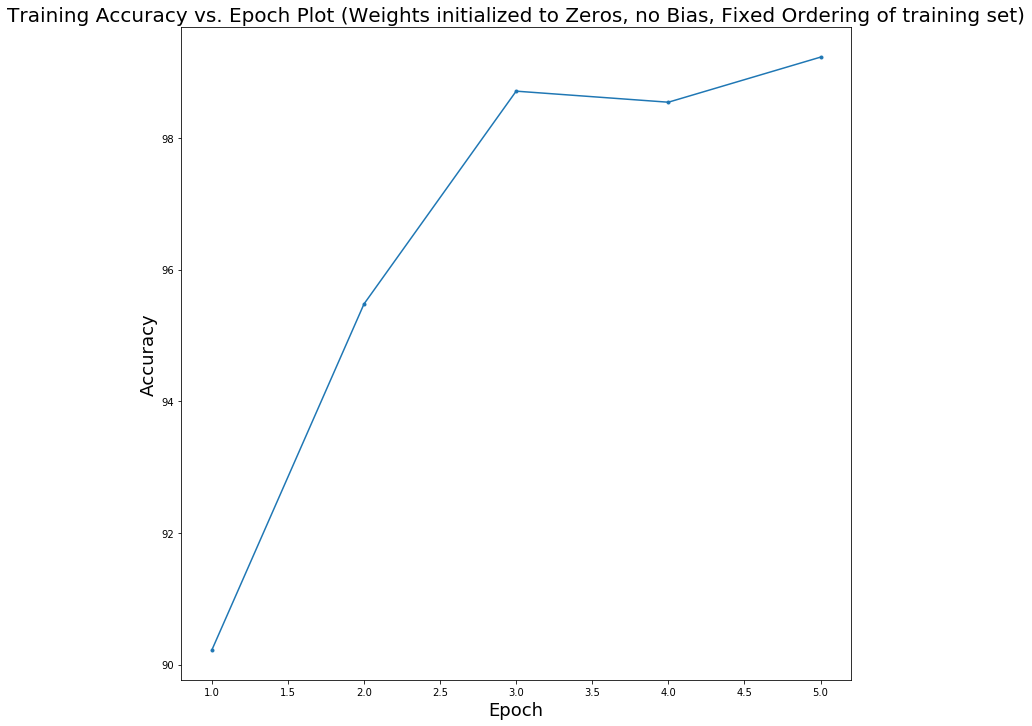

Test set Confusion Matrix: Actual vs. Prediction


Prediction,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,100.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,0.0,95.56,0.00,0.0,0.00,0.00,0.00,4.44,0.00,0.00
2,0.0,0.00,92.68,0.0,0.00,2.44,0.00,0.00,4.88,0.00
3,0.0,0.00,0.00,100.0,0.00,0.00,0.00,0.00,0.00,0.00
4,0.0,1.69,0.00,0.0,94.92,0.00,0.00,0.00,3.39,0.00
5,0.0,0.00,0.00,0.0,0.00,100.00,0.00,0.00,0.00,0.00
6,0.0,0.00,0.00,0.0,2.33,0.00,97.67,0.00,0.00,0.00
7,0.0,0.00,0.00,0.0,2.13,0.00,0.00,95.74,0.00,2.13
8,0.0,2.50,0.00,0.0,0.00,0.00,0.00,0.00,97.50,0.00


,Accuracy
0,100.00
1,95.56
2,92.68
3,100.00
4,94.92
5,100.00
6,97.67
7,95.74
8,97.50
9,95.24


Average Accuracy: 96.93100000000001




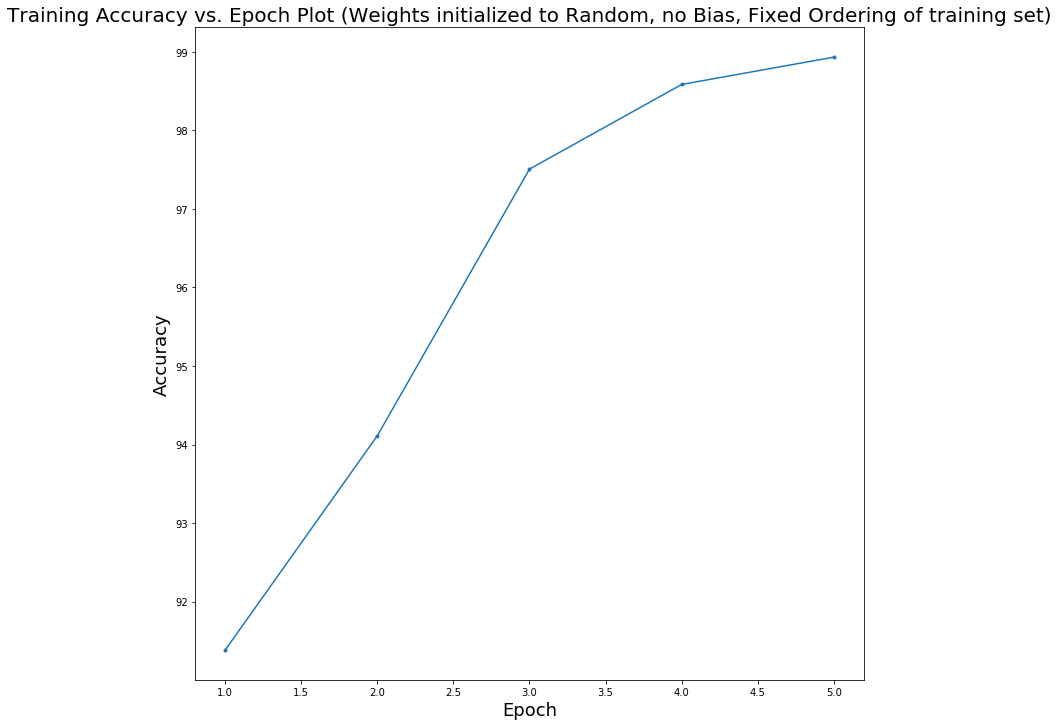

Test set Confusion Matrix: Actual vs. Prediction


Prediction,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,100.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
1,0.00,95.56,0.00,0.00,0.00,0.0,0.00,4.44,0.00,0.00
2,2.44,0.00,90.24,0.00,0.00,0.0,0.00,0.00,7.32,0.00
3,0.00,0.00,0.00,100.00,0.00,0.0,0.00,0.00,0.00,0.00
4,0.00,1.69,0.00,0.00,93.22,0.0,0.00,0.00,3.39,1.69
5,0.00,0.00,0.00,0.00,0.00,100.0,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,2.33,0.0,97.67,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.0,0.00,100.00,0.00,0.00
8,0.00,2.50,0.00,0.00,0.00,2.5,0.00,0.00,95.00,0.00


,Accuracy
0,100.00
1,95.56
2,90.24
3,100.00
4,93.22
5,100.00
6,97.67
7,100.00
8,95.00
9,97.62


Average Accuracy: 96.93100000000001




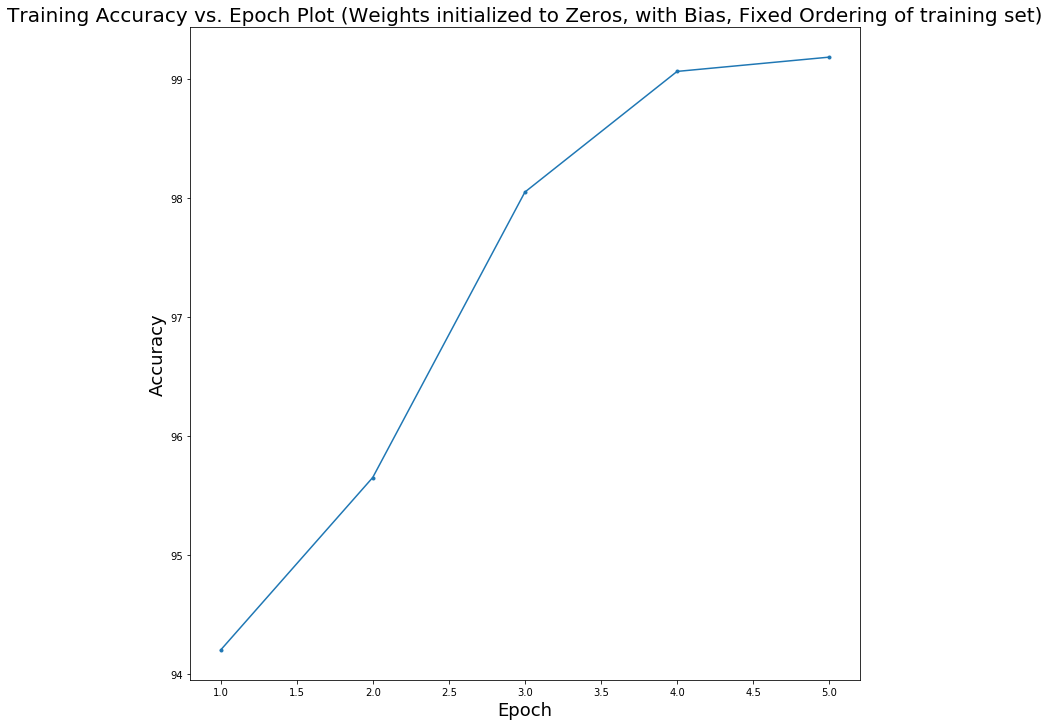

Test set Confusion Matrix: Actual vs. Prediction


Prediction,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,100.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.0,95.56,0.00,2.22,0.00,0.00,0.00,2.22,0.00,0.00
2,0.0,0.00,85.37,0.00,0.00,0.00,0.00,0.00,12.20,2.44
3,0.0,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.0,1.69,0.00,0.00,93.22,0.00,0.00,0.00,3.39,1.69
5,0.0,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00
6,0.0,0.00,0.00,0.00,2.33,0.00,97.67,0.00,0.00,0.00
7,0.0,0.00,0.00,0.00,2.13,0.00,0.00,97.87,0.00,0.00
8,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,97.50,2.50


,Accuracy
0,100.00
1,95.56
2,85.37
3,100.00
4,93.22
5,100.00
6,97.67
7,97.87
8,97.50
9,97.62


Average Accuracy: 96.48100000000001




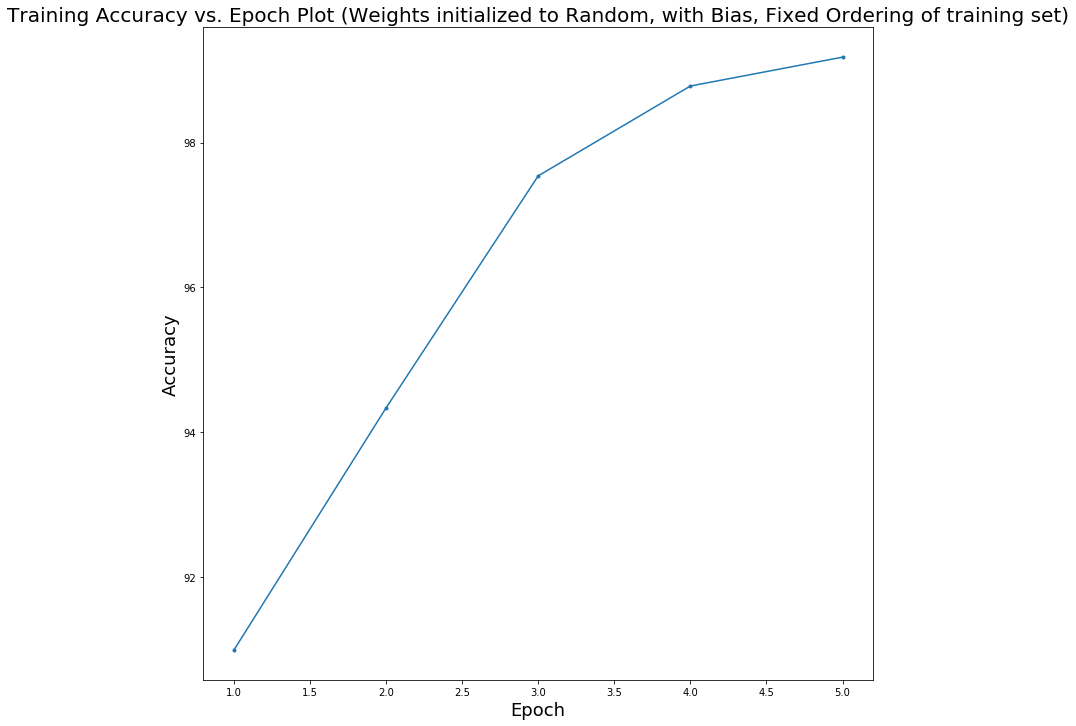

Test set Confusion Matrix: Actual vs. Prediction


Prediction,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,100.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.0,95.56,0.0,2.22,0.00,0.00,0.00,2.22,0.00,0.00
2,0.0,0.00,87.8,0.00,0.00,0.00,0.00,0.00,9.76,2.44
3,0.0,0.00,0.0,96.97,0.00,0.00,0.00,0.00,0.00,3.03
4,0.0,1.69,0.0,0.00,94.92,0.00,0.00,0.00,3.39,0.00
5,0.0,0.00,0.0,0.00,0.00,100.00,0.00,0.00,0.00,0.00
6,0.0,0.00,0.0,0.00,2.33,0.00,97.67,0.00,0.00,0.00
7,0.0,0.00,0.0,0.00,2.13,0.00,0.00,97.87,0.00,0.00
8,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,97.50,2.50


,Accuracy
0,100.00
1,95.56
2,87.80
3,96.97
4,94.92
5,100.00
6,97.67
7,97.87
8,97.50
9,92.86


Average Accuracy: 96.115




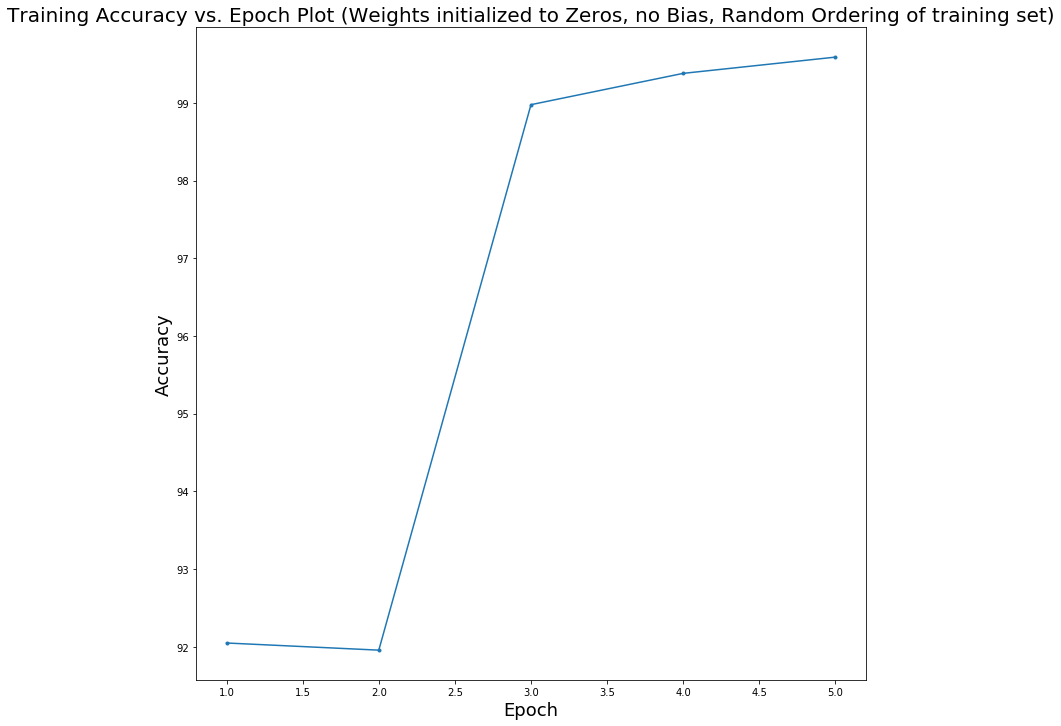

Test set Confusion Matrix: Actual vs. Prediction


Prediction,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,100.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.0,97.78,0.00,0.00,0.00,0.00,0.00,2.22,0.00,0.00
2,0.0,0.00,85.37,0.00,0.00,0.00,0.00,0.00,12.20,2.44
3,0.0,0.00,0.00,96.97,0.00,0.00,0.00,0.00,0.00,3.03
4,0.0,1.69,0.00,0.00,91.53,0.00,0.00,0.00,3.39,3.39
5,0.0,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00
6,0.0,0.00,0.00,0.00,2.33,0.00,95.35,0.00,2.33,0.00
7,0.0,0.00,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00
8,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00,0.00


,Accuracy
0,100.00
1,97.78
2,85.37
3,96.97
4,91.53
5,100.00
6,95.35
7,100.00
8,100.00
9,97.62


Average Accuracy: 96.462




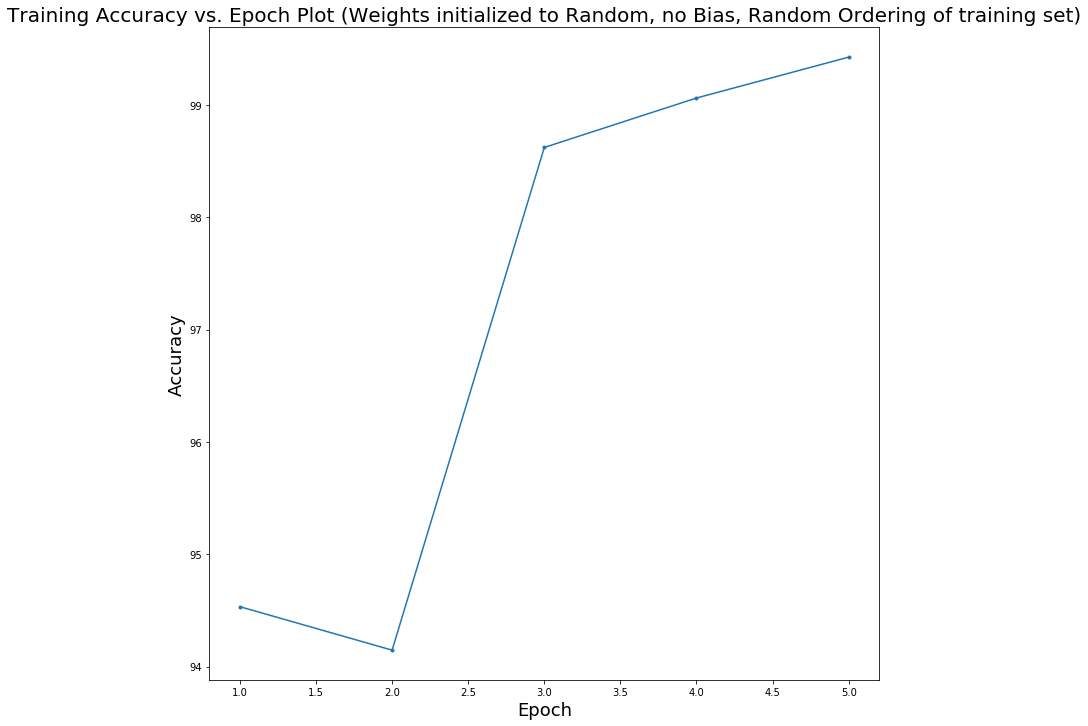

Test set Confusion Matrix: Actual vs. Prediction


Prediction,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,100.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
1,0.0,97.78,0.00,0.00,0.00,0.0,0.00,2.22,0.00,0.00
2,0.0,0.00,85.37,0.00,0.00,0.0,0.00,0.00,12.20,2.44
3,0.0,0.00,0.00,96.97,0.00,0.0,0.00,0.00,0.00,3.03
4,0.0,0.00,0.00,0.00,94.92,0.0,0.00,0.00,3.39,1.69
5,0.0,0.00,0.00,0.00,0.00,100.0,0.00,0.00,0.00,0.00
6,0.0,0.00,0.00,0.00,2.33,0.0,97.67,0.00,0.00,0.00
7,0.0,0.00,0.00,0.00,0.00,0.0,0.00,100.00,0.00,0.00
8,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,97.50,2.50


,Accuracy
0,100.00
1,97.78
2,85.37
3,96.97
4,94.92
5,100.00
6,97.67
7,100.00
8,97.50
9,95.24


Average Accuracy: 96.545




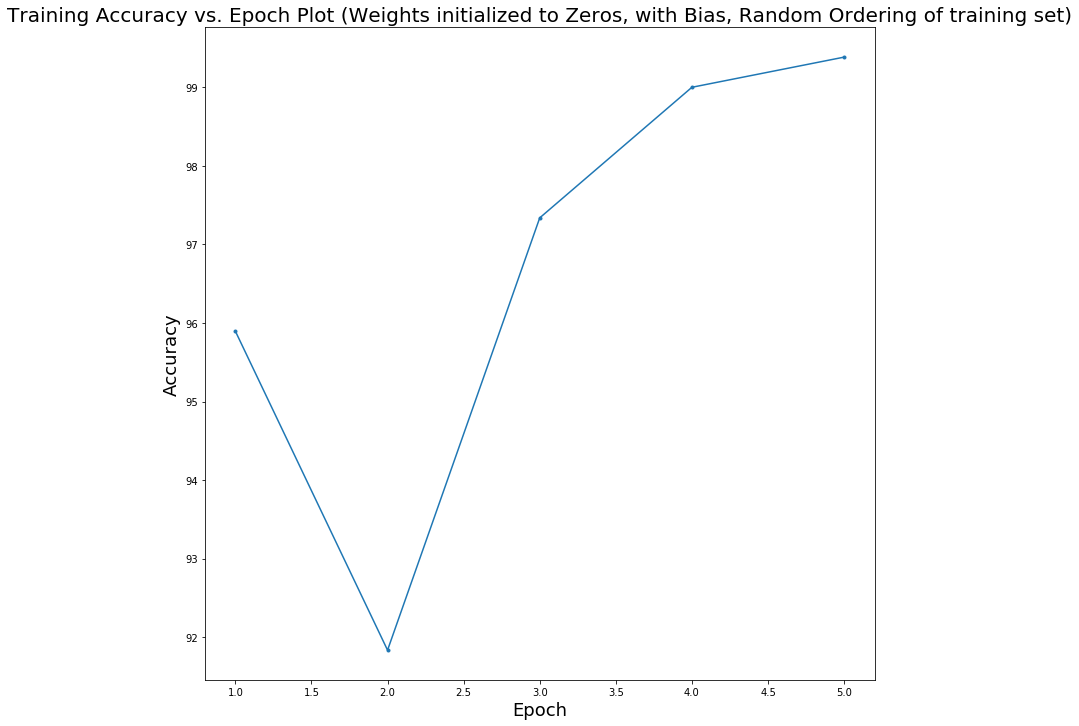

Test set Confusion Matrix: Actual vs. Prediction


Prediction,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,100.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.0,95.56,0.0,0.00,0.00,0.00,0.00,4.44,0.00,0.00
2,0.0,0.00,87.8,0.00,0.00,2.44,0.00,0.00,9.76,0.00
3,0.0,0.00,0.0,96.97,0.00,0.00,0.00,0.00,0.00,3.03
4,0.0,0.00,0.0,0.00,93.22,0.00,0.00,0.00,3.39,3.39
5,0.0,0.00,0.0,0.00,0.00,100.00,0.00,0.00,0.00,0.00
6,0.0,0.00,0.0,0.00,2.33,0.00,95.35,0.00,2.33,0.00
7,0.0,0.00,0.0,0.00,0.00,0.00,0.00,100.00,0.00,0.00
8,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,97.50,2.50


,Accuracy
0,100.00
1,95.56
2,87.80
3,96.97
4,93.22
5,100.00
6,95.35
7,100.00
8,97.50
9,92.86


Average Accuracy: 95.926




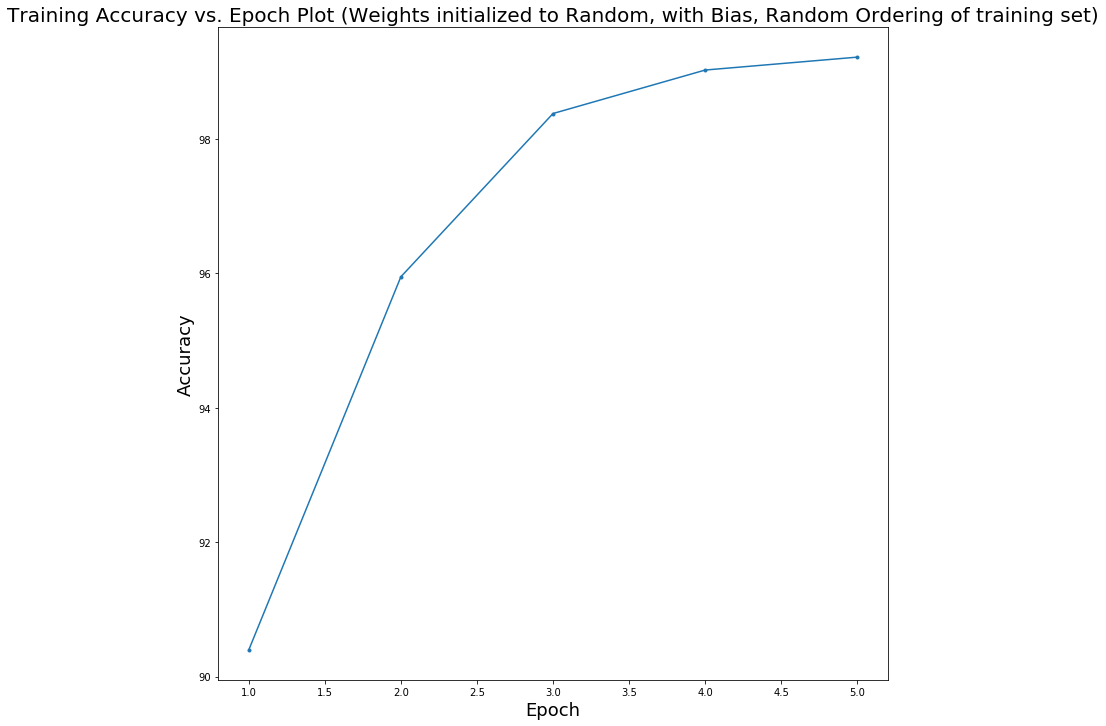

Test set Confusion Matrix: Actual vs. Prediction


Prediction,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,100.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
1,0.00,95.56,0.00,0.00,0.00,0.0,0.00,4.44,0.00,0.00
2,0.00,0.00,85.37,0.00,0.00,0.0,0.00,0.00,12.20,2.44
3,0.00,0.00,0.00,96.97,0.00,0.0,0.00,0.00,0.00,3.03
4,0.00,0.00,0.00,0.00,93.22,0.0,0.00,0.00,5.08,1.69
5,0.00,0.00,0.00,0.00,0.00,100.0,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,2.33,0.0,97.67,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,2.13,0.0,0.00,95.74,0.00,2.13
8,0.00,0.00,0.00,2.50,0.00,2.5,0.00,0.00,92.50,2.50


,Accuracy
0,100.00
1,95.56
2,85.37
3,96.97
4,93.22
5,100.00
6,97.67
7,95.74
8,92.50
9,92.86


Average Accuracy: 94.989




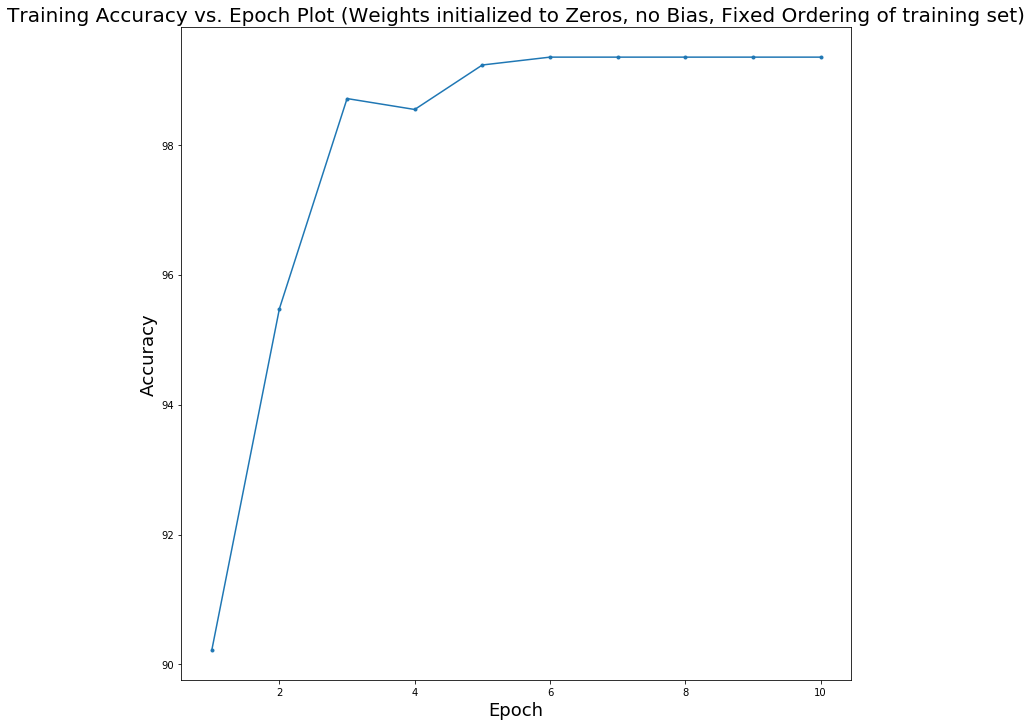

Test set Confusion Matrix: Actual vs. Prediction


Prediction,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,100.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,0.0,95.56,0.00,0.0,0.00,0.00,0.00,4.44,0.00,0.00
2,0.0,0.00,92.68,0.0,0.00,2.44,0.00,0.00,4.88,0.00
3,0.0,0.00,0.00,100.0,0.00,0.00,0.00,0.00,0.00,0.00
4,0.0,1.69,0.00,0.0,94.92,0.00,0.00,0.00,3.39,0.00
5,0.0,0.00,0.00,0.0,0.00,100.00,0.00,0.00,0.00,0.00
6,0.0,0.00,0.00,0.0,2.33,0.00,97.67,0.00,0.00,0.00
7,0.0,0.00,0.00,0.0,2.13,0.00,0.00,95.74,0.00,2.13
8,0.0,2.50,0.00,0.0,0.00,0.00,0.00,0.00,97.50,0.00


,Accuracy
0,100.00
1,95.56
2,92.68
3,100.00
4,94.92
5,100.00
6,97.67
7,95.74
8,97.50
9,97.62


Average Accuracy: 97.16900000000001




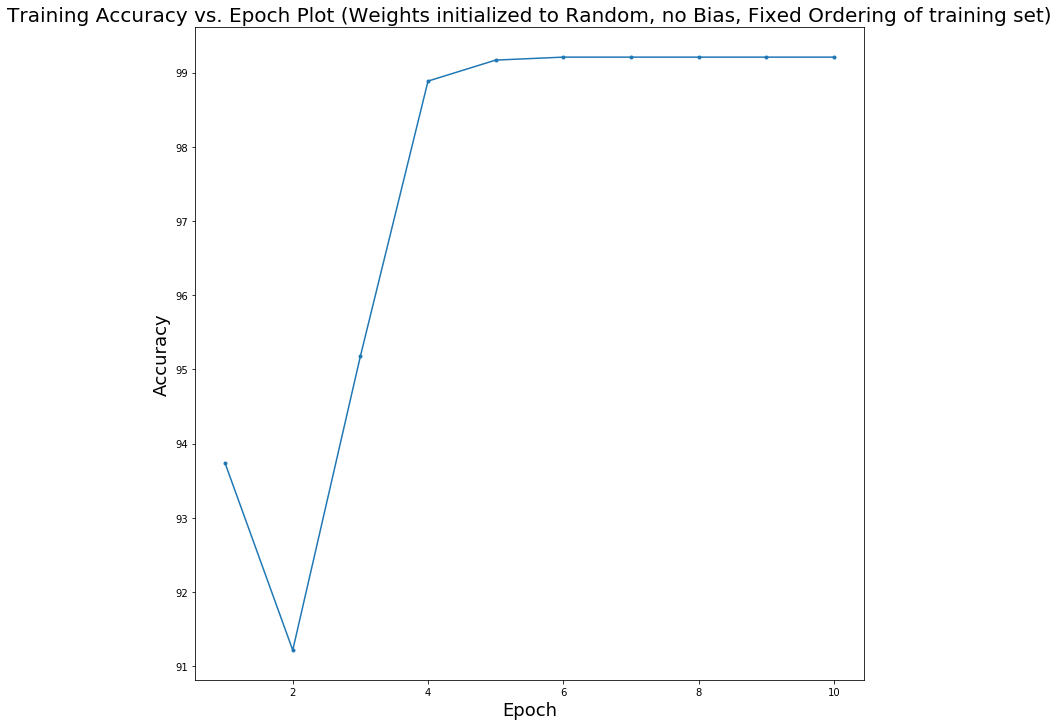

Test set Confusion Matrix: Actual vs. Prediction


Prediction,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,100.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00
1,0.00,93.33,0.0,2.22,0.00,0.0,0.00,4.44,0.00,0.00
2,0.00,0.00,87.8,0.00,0.00,0.0,0.00,0.00,9.76,2.44
3,0.00,0.00,0.0,100.00,0.00,0.0,0.00,0.00,0.00,0.00
4,0.00,1.69,0.0,0.00,91.53,0.0,0.00,0.00,6.78,0.00
5,0.00,0.00,0.0,0.00,0.00,100.0,0.00,0.00,0.00,0.00
6,2.33,0.00,0.0,0.00,0.00,0.0,97.67,0.00,0.00,0.00
7,0.00,0.00,0.0,0.00,2.13,0.0,0.00,97.87,0.00,0.00
8,0.00,2.50,0.0,0.00,0.00,0.0,0.00,0.00,97.50,0.00


,Accuracy
0,100.00
1,93.33
2,87.80
3,100.00
4,91.53
5,100.00
6,97.67
7,97.87
8,97.50
9,100.00


Average Accuracy: 96.57000000000001




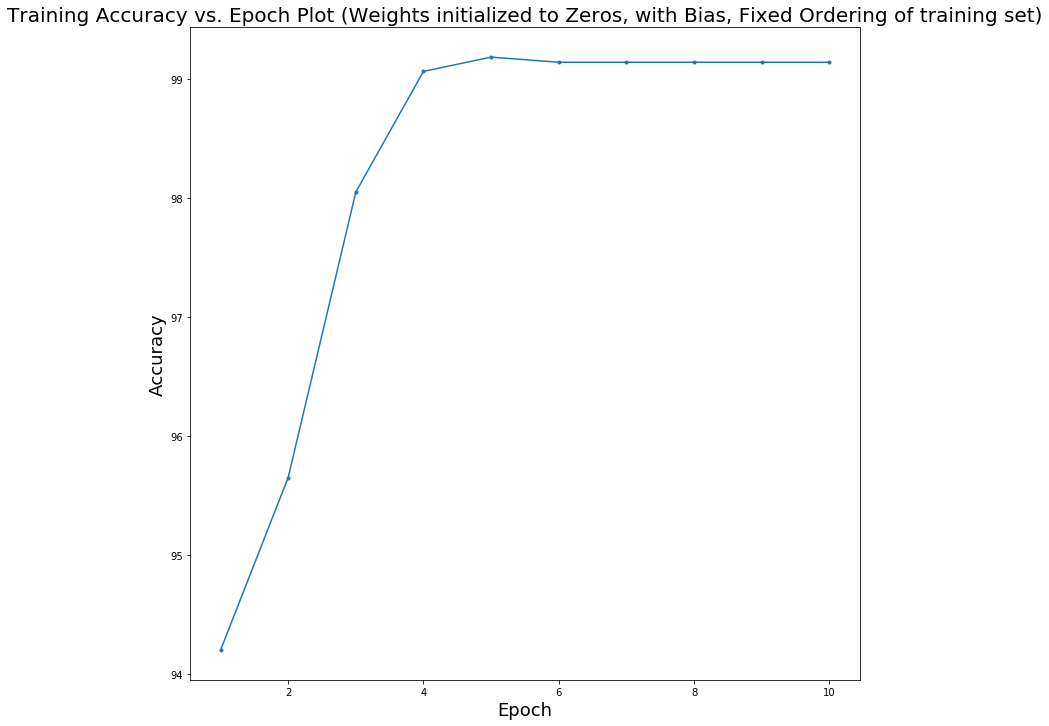

Test set Confusion Matrix: Actual vs. Prediction


Prediction,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,100.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.0,95.56,0.0,2.22,0.00,0.00,0.00,2.22,0.00,0.00
2,0.0,0.00,87.8,0.00,0.00,0.00,0.00,0.00,9.76,2.44
3,0.0,0.00,0.0,100.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.0,3.39,0.0,0.00,91.53,0.00,0.00,0.00,3.39,1.69
5,0.0,0.00,0.0,0.00,0.00,100.00,0.00,0.00,0.00,0.00
6,0.0,0.00,0.0,0.00,2.33,0.00,97.67,0.00,0.00,0.00
7,0.0,0.00,0.0,0.00,2.13,0.00,0.00,97.87,0.00,0.00
8,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,97.50,2.50


,Accuracy
0,100.00
1,95.56
2,87.80
3,100.00
4,91.53
5,100.00
6,97.67
7,97.87
8,97.50
9,97.62


Average Accuracy: 96.555




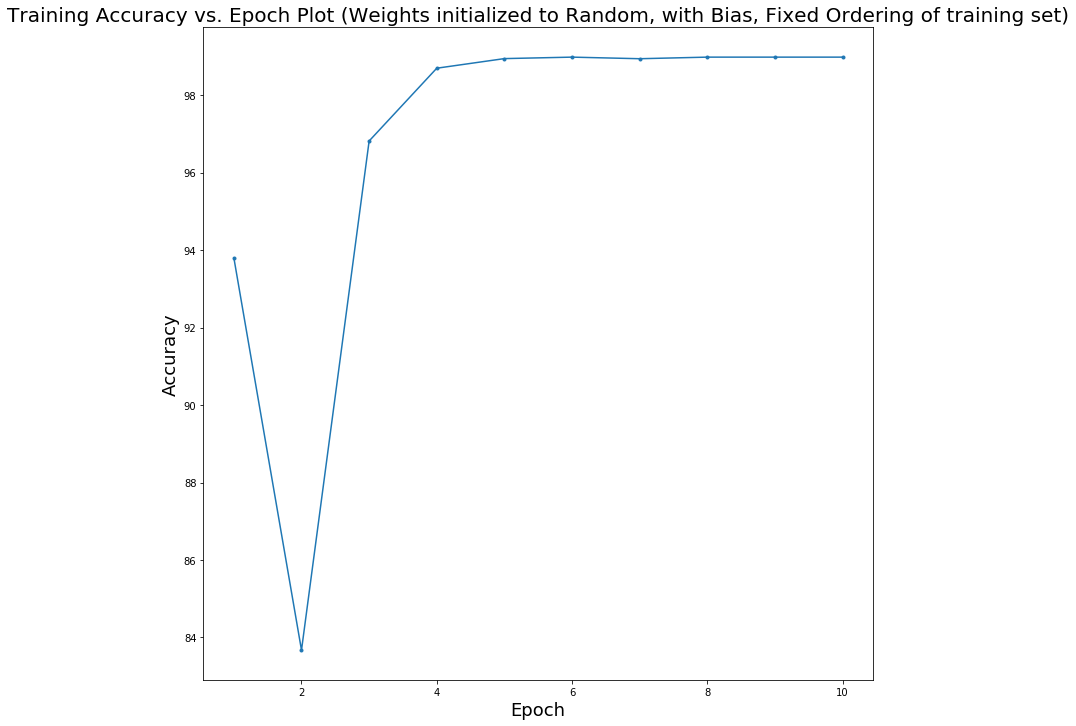

Test set Confusion Matrix: Actual vs. Prediction


Prediction,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,100.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0
1,0.00,95.56,0.0,0.0,0.00,0.0,0.00,4.44,0.00,0.0
2,2.44,0.00,87.8,0.0,0.00,0.0,0.00,0.00,9.76,0.0
3,0.00,0.00,0.0,100.0,0.00,0.0,0.00,0.00,0.00,0.0
4,0.00,1.69,0.0,0.0,94.92,0.0,0.00,0.00,3.39,0.0
5,0.00,0.00,0.0,0.0,0.00,100.0,0.00,0.00,0.00,0.0
6,0.00,0.00,0.0,0.0,2.33,0.0,97.67,0.00,0.00,0.0
7,0.00,0.00,0.0,0.0,0.00,0.0,0.00,100.00,0.00,0.0
8,0.00,0.00,0.0,0.0,0.00,2.5,0.00,0.00,97.50,0.0


,Accuracy
0,100.00
1,95.56
2,87.80
3,100.00
4,94.92
5,100.00
6,97.67
7,100.00
8,97.50
9,100.00


Average Accuracy: 97.345




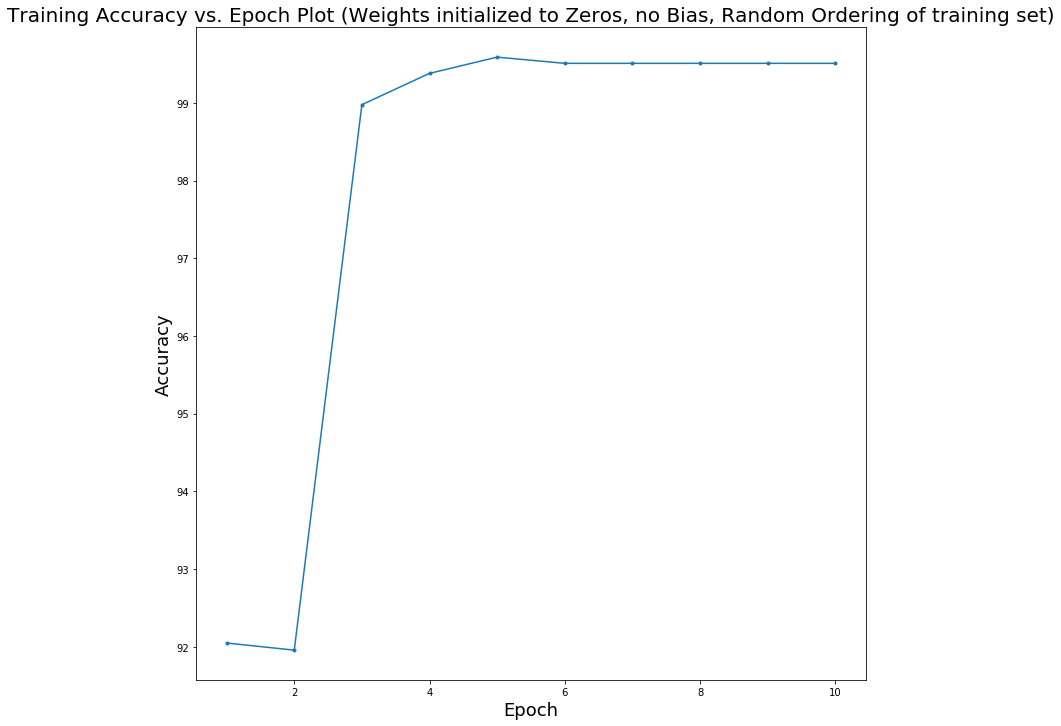

Test set Confusion Matrix: Actual vs. Prediction


Prediction,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,100.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,0.0,97.78,0.00,0.0,0.00,0.00,0.00,2.22,0.00,0.00
2,0.0,0.00,85.37,0.0,0.00,0.00,0.00,0.00,12.20,2.44
3,0.0,0.00,0.00,100.0,0.00,0.00,0.00,0.00,0.00,0.00
4,0.0,1.69,0.00,0.0,91.53,0.00,0.00,0.00,3.39,3.39
5,0.0,0.00,0.00,0.0,0.00,100.00,0.00,0.00,0.00,0.00
6,0.0,0.00,0.00,0.0,2.33,0.00,95.35,0.00,2.33,0.00
7,0.0,0.00,0.00,0.0,2.13,0.00,0.00,97.87,0.00,0.00
8,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,100.00,0.00


,Accuracy
0,100.00
1,97.78
2,85.37
3,100.00
4,91.53
5,100.00
6,95.35
7,97.87
8,100.00
9,97.62


Average Accuracy: 96.55199999999999




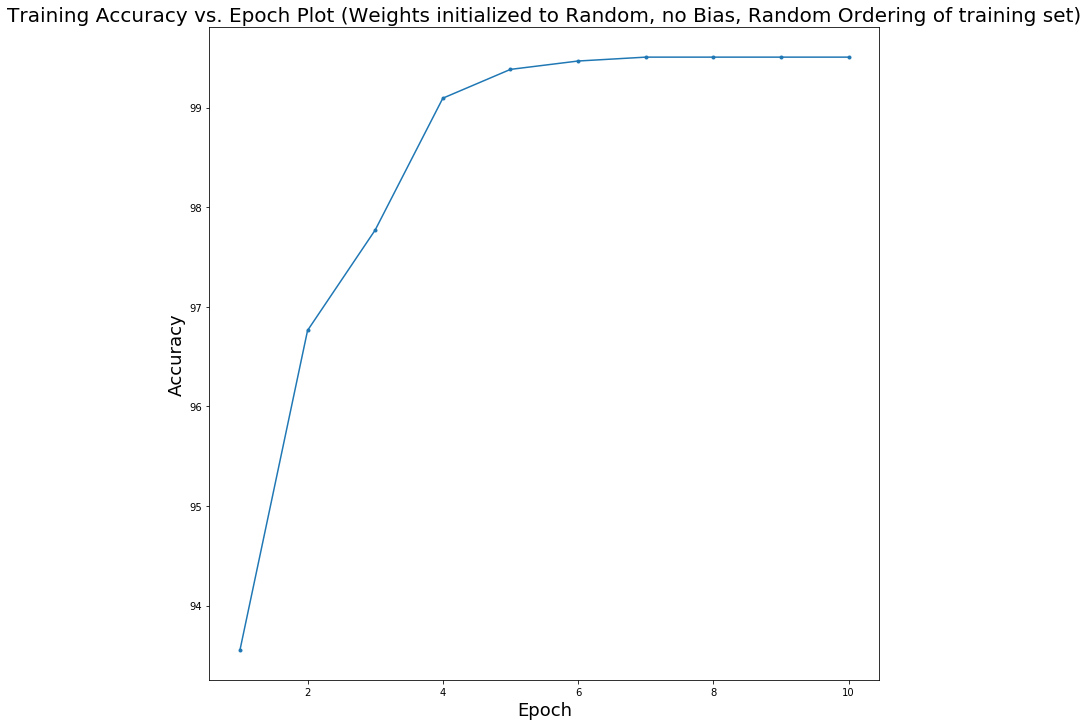

Test set Confusion Matrix: Actual vs. Prediction


Prediction,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,100.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,97.78,0.0,0.00,0.00,0.00,0.00,2.22,0.00,0.00
2,0.00,0.00,87.8,0.00,0.00,0.00,0.00,0.00,9.76,2.44
3,0.00,0.00,0.0,96.97,0.00,0.00,0.00,0.00,0.00,3.03
4,0.00,0.00,0.0,0.00,94.92,0.00,0.00,0.00,3.39,1.69
5,0.00,0.00,0.0,0.00,0.00,100.00,0.00,0.00,0.00,0.00
6,2.33,0.00,0.0,0.00,0.00,0.00,95.35,0.00,2.33,0.00
7,0.00,0.00,0.0,0.00,2.13,0.00,0.00,97.87,0.00,0.00
8,0.00,0.00,0.0,0.00,0.00,2.50,0.00,0.00,95.00,2.50


,Accuracy
0,100.00
1,97.78
2,87.80
3,96.97
4,94.92
5,100.00
6,95.35
7,97.87
8,95.00
9,95.24


Average Accuracy: 96.09299999999999




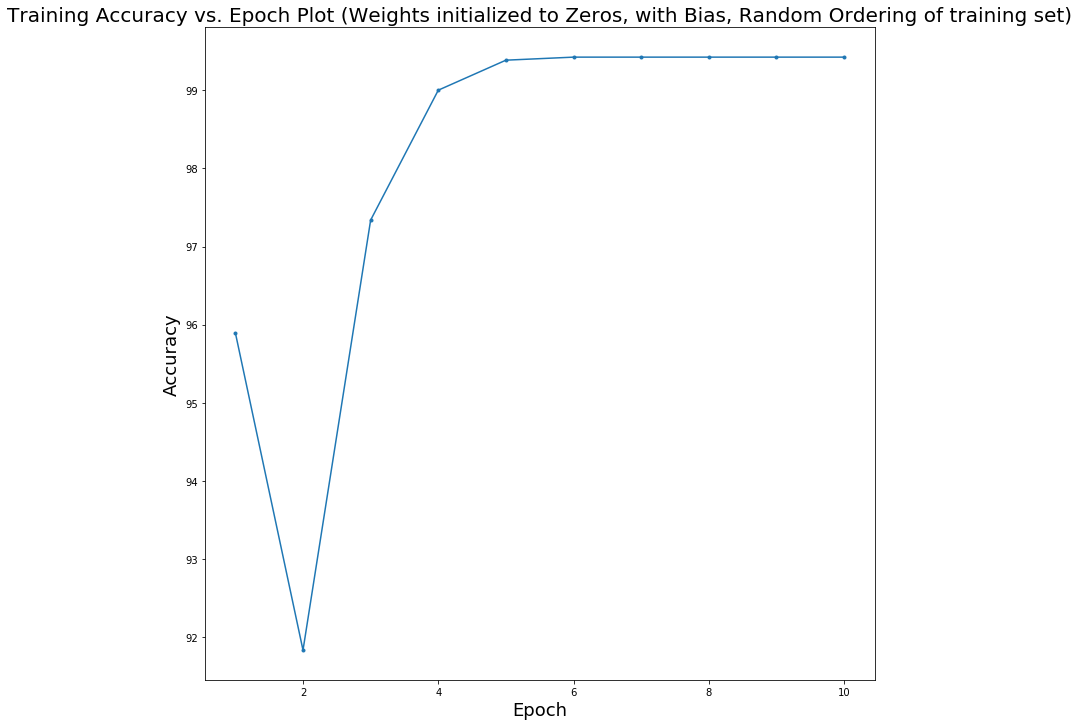

Test set Confusion Matrix: Actual vs. Prediction


Prediction,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,100.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.0,95.56,0.0,0.00,0.00,0.00,0.00,4.44,0.00,0.00
2,0.0,0.00,87.8,0.00,0.00,2.44,0.00,0.00,9.76,0.00
3,0.0,0.00,0.0,96.97,0.00,0.00,0.00,0.00,0.00,3.03
4,0.0,0.00,0.0,0.00,93.22,0.00,0.00,0.00,3.39,3.39
5,0.0,0.00,0.0,0.00,0.00,100.00,0.00,0.00,0.00,0.00
6,0.0,0.00,0.0,0.00,2.33,0.00,95.35,0.00,2.33,0.00
7,0.0,0.00,0.0,0.00,0.00,0.00,0.00,100.00,0.00,0.00
8,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,97.50,2.50


,Accuracy
0,100.00
1,95.56
2,87.80
3,96.97
4,93.22
5,100.00
6,95.35
7,100.00
8,97.50
9,92.86


Average Accuracy: 95.926




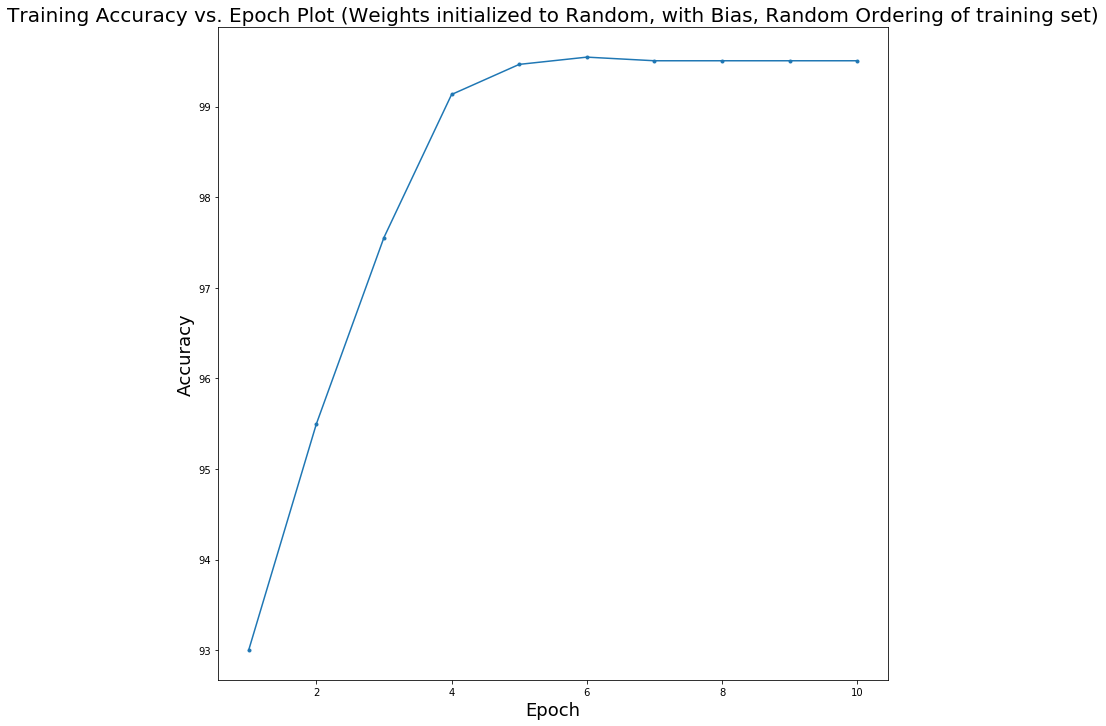

Test set Confusion Matrix: Actual vs. Prediction


Prediction,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,100.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00
1,0.0,95.56,0.0,2.22,0.00,0.0,0.00,2.22,0.00,0.00
2,0.0,0.00,87.8,0.00,0.00,0.0,0.00,0.00,9.76,2.44
3,0.0,0.00,0.0,100.00,0.00,0.0,0.00,0.00,0.00,0.00
4,0.0,0.00,0.0,0.00,94.92,0.0,0.00,0.00,3.39,1.69
5,0.0,0.00,0.0,0.00,0.00,100.0,0.00,0.00,0.00,0.00
6,0.0,0.00,0.0,0.00,2.33,0.0,97.67,0.00,0.00,0.00
7,0.0,0.00,0.0,0.00,2.13,0.0,0.00,97.87,0.00,0.00
8,0.0,0.00,0.0,0.00,0.00,2.5,0.00,0.00,97.50,0.00


,Accuracy
0,100.00
1,95.56
2,87.80
3,100.00
4,94.92
5,100.00
6,97.67
7,97.87
8,97.50
9,95.24


Average Accuracy: 96.656




In [20]:
df_train_all = [pd.concat([df_trainX, df_trainY], axis=1),         # no bias, fixed order
                pd.concat([df_trainX, df_trainY], axis=1),         # with bias, fixed order
                pd.concat([df_trainX, df_trainY], axis=1),         # no bias, random order
                pd.concat([df_trainX, df_trainY], axis=1)]         # with bias, random order
df_train_all[1].insert(1024, 'bias', 1)

df_train_all[2] = df_train_all[2].reindex(np.random.permutation(df_train_all[1].index))
df_train_all[2] = df_train_all[2].reset_index(drop=True)

df_train_all[3].insert(1024, 'bias', 1)
df_train_all[3] = df_train_all[3].reindex(np.random.permutation(df_train_all[3].index))
df_train_all[3] = df_train_all[3].reset_index(drop=True)


df_test_all = [pd.concat([df_testX, df_testY], axis=1),         # no bias
               pd.concat([df_testX, df_testY], axis=1)]         # with bias
df_test_all[1].insert(1024, 'bias', 1)




epoch_nums = [3, 5, 10]

for epoch_num in epoch_nums:
    for df_num, df_train in enumerate(df_train_all):
        weight_vectors_zero_rand = [np.zeros((10, 1024)), 
                                    np.zeros((10, 1025)), 
                                    np.random.rand(10, 1024)*10, 
                                    np.random.rand(10, 1025)*10]
        for weight_num, weight_vectors in enumerate(weight_vectors_zero_rand):
            if df_train.values.shape[1] != weight_vectors.shape[1] + 1:
                continue
            acc_per_epoch = []
            eta = 1
            for epoch in range(1,epoch_num+1):
                for idx in range(len(df_train)):
                    arg_max, predicted_class = 0, 0
                    category = df_train.iloc[idx,-1]
                    feature_vector = df_train.iloc[idx,:-1].values

                    for c in range(10):
                        current = np.dot(feature_vector, weight_vectors[c])
                        if current >= arg_max:
                            arg_max, predicted_class = current, c

                    if not (category == predicted_class):
                        weight_vectors[category] += eta * feature_vector
                        weight_vectors[predicted_class] -= eta * feature_vector
                train_pred = predict(df_train.iloc[:,:-1], weight_vectors)
                acc, _ = calculate_acc_conf_mat(df_train.iloc[:,-1], train_pred)
                acc_per_epoch.append(acc)
                eta = eta / epoch

            f, ax = plt.subplots(1, 1, figsize=(12,12))
            ax.plot(range(1,epoch_num+1), acc_per_epoch, marker='.')
            ax.set_xlabel('Epoch', fontsize=18)
            ax.set_ylabel('Accuracy', fontsize=18)
            title_str = ''
            if weight_num > 1:
                title_str += 'Weights initialized to Random'
                if weight_vectors.shape[1] == 1025:
                    title_str += ', with Bias'
                    if df_num > 1:
                        title_str += ', Random Ordering of training set'
                    else:
                        title_str += ', Fixed Ordering of training set'
                else:
                    title_str += ', no Bias'
                    if df_num > 1:
                        title_str += ', Random Ordering of training set'
                    else:
                        title_str += ', Fixed Ordering of training set'
            else:
                title_str += 'Weights initialized to Zeros'
                if weight_vectors.shape[1] == 1025:
                    title_str += ', with Bias'
                    if df_num > 1:
                        title_str += ', Random Ordering of training set'
                    else:
                        title_str += ', Fixed Ordering of training set'
                else:
                    title_str += ', no Bias'
                    if df_num > 1:
                        title_str += ', Random Ordering of training set'
                    else:
                        title_str += ', Fixed Ordering of training set'
            plt.title('Training Accuracy vs. Epoch Plot ({})'.format(title_str), fontsize=20)
            plt.show()

            if weight_vectors.shape[1] == 1025:
                df_to_test = df_test_all[1]
            else:
                df_to_test = df_test_all[0]
            test_pred = predict(df_to_test.iloc[:,:-1], weight_vectors)
            acc_test, conf_mat_test = calculate_acc_conf_mat(df_to_test.iloc[:,-1], test_pred)
            print('Test set Confusion Matrix: Actual vs. Prediction')
            display(conf_mat_test)
            display(pd.DataFrame(np.diag(conf_mat_test), columns=['Accuracy']))
            print('Average Accuracy: {}'.format(acc_test))
            print('\n')